In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
df=pd.read_csv('/content/churn_data_logistic2 (1).csv')

In [ ]:
# List of categorical columns to one-hot encode
categorical_cols = ['Marital', 'Default','Housing Loan', 'Personal Loan', 'Current Campaign']

# Perform one-hot encoding
df_enc = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the updated DataFrame
print(df_enc.head())

   Age  Balance  Churn  Marital_Married  Marital_Single  Default_1  \
0   56    36515      1            False           False       True   
1   69    87144      1            False           False      False   
2   46    25898      1            False           False       True   
3   32      -81      0             True           False      False   
4   60    48070      0             True           False      False   

   Housing Loan_1  Personal Loan_1  Current Campaign_1  
0            True            False               False  
1           False             True               False  
2           False             True               False  
3           False            False                True  
4            True            False               False  


In [ ]:
# Define features and target variable
X = df_enc.drop('Churn', axis=1)
y = df_enc['Churn']
# Split the dataset into training and testing sets with 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
# Standardize continuous features (Age, Balance)
#scaler = StandardScaler()
#X_train[['age', 'balance']] = scaler.fit_transform(X_train[['age', 'balance']])
#X_test[['age', 'balance']] = scaler.transform(X_test[['age', 'balance']])
X_train.head()

,Age,Balance,Marital_Married,Marital_Single,Default_1,Housing Loan_1,Personal Loan_1,Current Campaign_1
4739,20,86529,False,True,True,True,False,False
3344,26,23444,False,True,False,True,True,False
4557,26,98290,False,True,True,False,True,True
5344,74,44413,False,False,False,True,True,True
3678,63,16242,False,False,True,True,False,True


In [ ]:
# Assuming df_enc is your DataFrame after one-hot encoding

# Find boolean columns
boolean_cols = [col for col in df_enc.columns if pd.api.types.is_bool_dtype(df_enc[col])]

# Convert boolean columns to 0s and 1s
for col in boolean_cols:
    df_enc[col] = df_enc[col].astype(int)

# Display the first few rows of the updated DataFrame
print(df_enc.head())

   Age  Balance  Churn  Marital_Married  Marital_Single  Default_1  \
0   56    36515      1                0               0          1   
1   69    87144      1                0               0          0   
2   46    25898      1                0               0          1   
3   32      -81      0                1               0          0   
4   60    48070      0                1               0          0   

   Housing Loan_1  Personal Loan_1  Current Campaign_1  
0               1                0                   0  
1               0                1                   0  
2               0                1                   0  
3               0                0                   1  
4               1                0                   0  


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the CART model
cart_model = DecisionTreeClassifier(random_state=24)

# Fit the model to the training data (using the selected features)
cart_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=24)

decision tree classifier will only run if the model converges

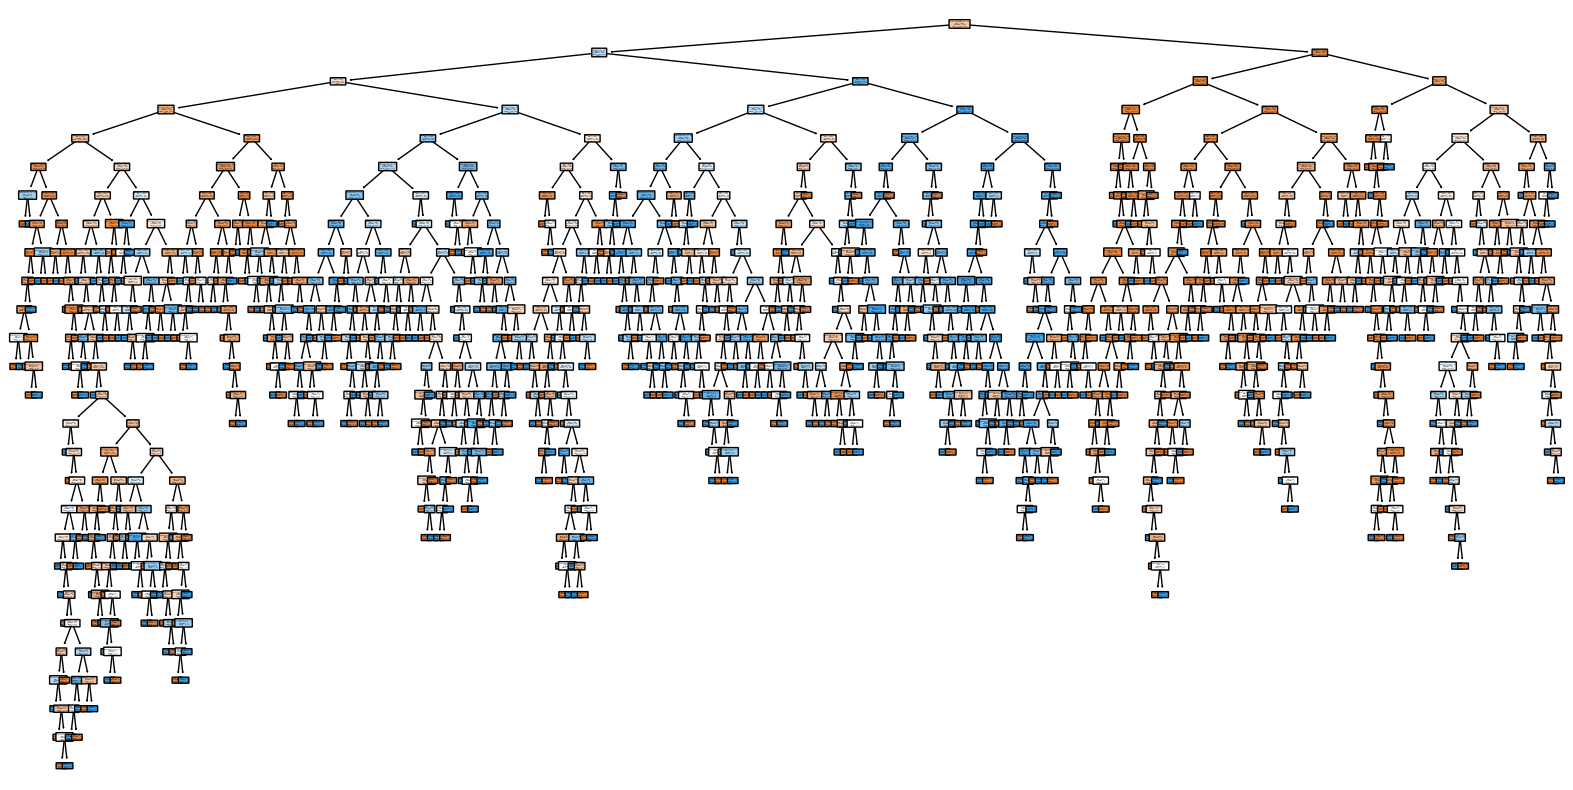

In [ ]:
# prompt: display the tree diagram of the cart model

from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(cart_model, feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

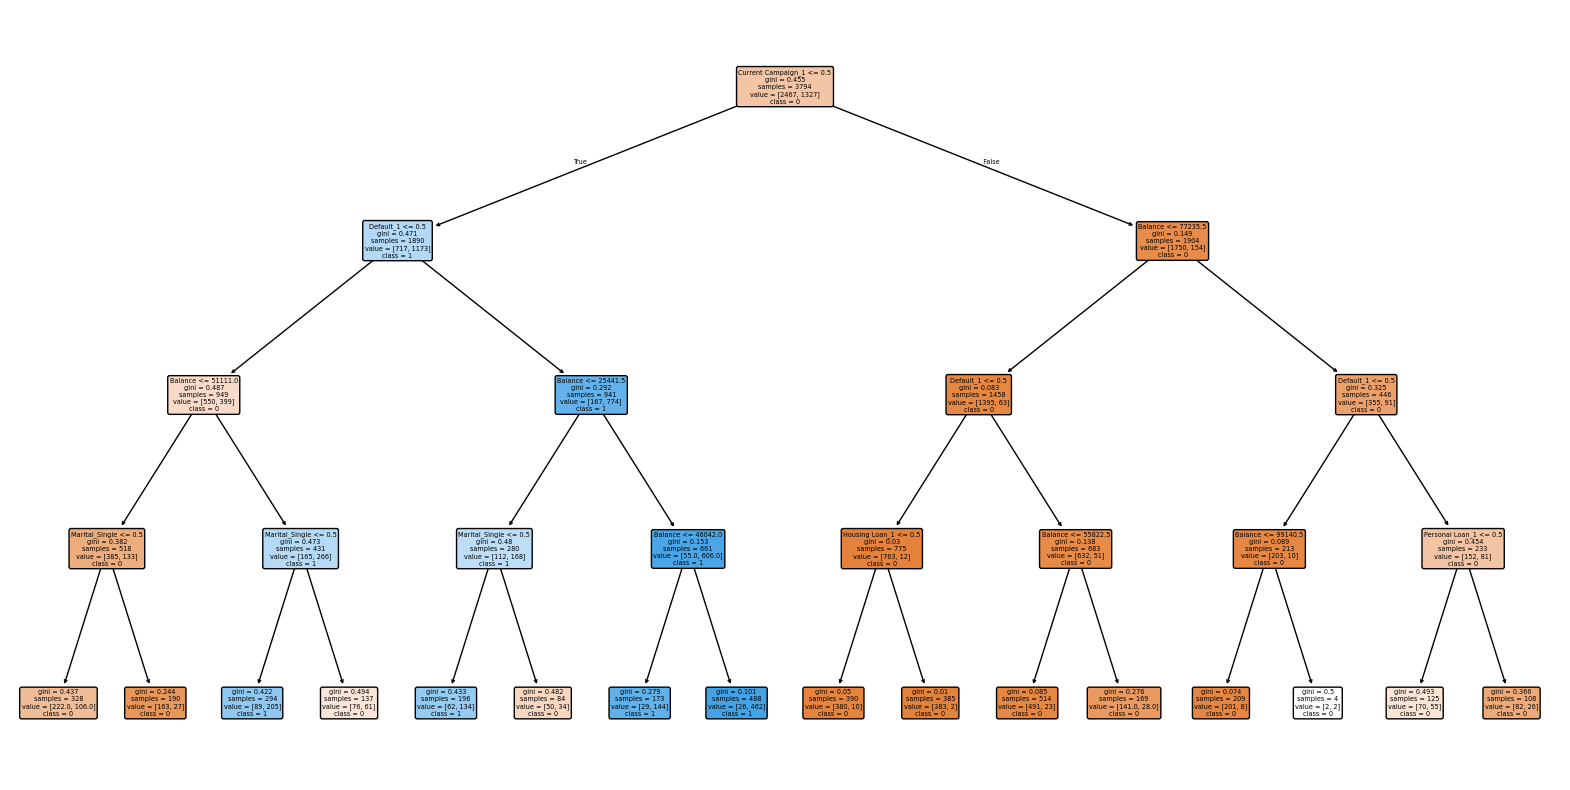

In [ ]:
# prompt: prune the tree for 4 levels

# Initialize the CART model with max_depth=4
cart_model = DecisionTreeClassifier(max_depth=4, random_state=24)

# Fit the model to the training data
cart_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(cart_model, feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

In [ ]:
# prompt: write x_train to a x train excel file and y_train to y train excel file

# Save X_train to an Excel file
X_train.to_excel('x_train.xlsx', index=False)

# Save y_train to an Excel file
y_train.to_excel('y_train.xlsx', index=False)

In [ ]:
X_train.head()

,Age,Balance,Marital_Married,Marital_Single,Default_1,Housing Loan_1,Personal Loan_1,Current Campaign_1
4739,20,86529,False,True,True,True,False,False
3344,26,23444,False,True,False,True,True,False
4557,26,98290,False,True,True,False,True,True
5344,74,44413,False,False,False,True,True,True
3678,63,16242,False,False,True,True,False,True


In [ ]:
# prompt: with index x train to input file and y train to pred file

# Assuming X_train and y_train are already defined as in your provided code

# Save X_train to a file with index
X_train.to_csv('input.csv', index=True)

# Save y_train to a file
y_train.to_csv('pred.csv', index=False, header=False) #No header, just values

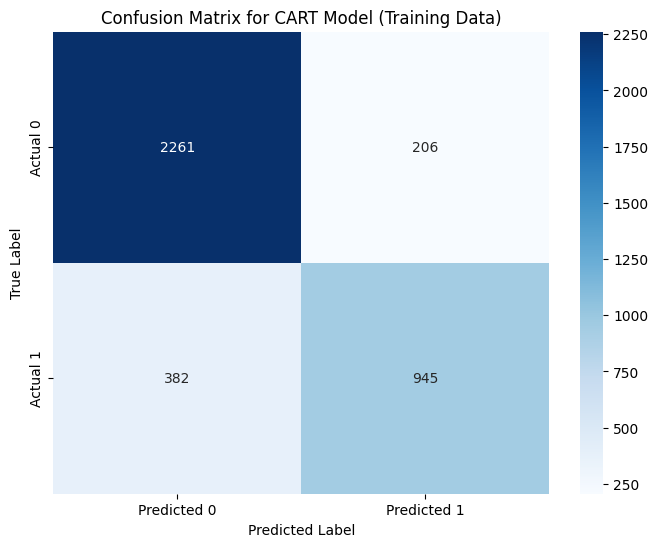

CART Model Performance (Training Data):
Accuracy: 0.8450
Precision: 0.8210
Recall: 0.7121
F1 Score: 0.7627


In [ ]:
# Predict on the training data
y_pred_cart = cart_model.predict(X_train)

# Create the confusion matrix
cm_cart = confusion_matrix(y_train, y_pred_cart)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cart, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for CART Model (Training Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate evaluation metrics
accuracy_cart = accuracy_score(y_train, y_pred_cart)
precision_cart = precision_score(y_train, y_pred_cart)
recall_cart = recall_score(y_train, y_pred_cart)
f1_cart = f1_score(y_train, y_pred_cart)

print(f"CART Model Performance (Training Data):")
print(f"Accuracy: {accuracy_cart:.4f}")
print(f"Precision: {precision_cart:.4f}")
print(f"Recall: {recall_cart:.4f}")
print(f"F1 Score: {f1_cart:.4f}")